In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_info = pd.read_csv(r"C:\Users\ppryh\study_case\vg_data_dictionary.csv")

In [3]:
# check data dictionary to understand data
print(data_info.sample(14))

           Field                                     Description
4      publisher                           Publisher of the game
13   last_update                  Date the data was last updated
2        console               Console the game was released for
6   critic_score                    Metacritic score (out of 10)
3          genre                               Genre of the game
10     pal_sales  European & African sales of copies in millions
11   other_sales       Rest of world sales of copies in millions
0            img        URL slug for the box art at vgchartz.com
8       na_sales      North American sales of copies in millions
12  release_date                   Date the game was released on
1          title                                      Game title
5      developer                           Developer of the game
9       jp_sales            Japanese sales of copies in millions
7    total_sales              Global sales of copies in millions


In [4]:
games_data = pd.read_csv(r"C:\Users\ppryh\study_case\vgchartz-2024.csv")

In [5]:
# brief check of data
games_data.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [6]:
# Top 10 titles by total sales
top_worldwide_sales = games_data.groupby('title').agg({
    'total_sales': 'sum'
}).sort_values(by='total_sales', ascending=False).reset_index()

print("Top 10 titles with the highest worldwide sales:")
print(top_worldwide_sales.head(10))

Top 10 titles with the highest worldwide sales:
                            title  total_sales
0              Grand Theft Auto V        64.29
1         Call of Duty: Black Ops        30.99
2  Call of Duty: Modern Warfare 3        30.71
3      Call of Duty: Black Ops II        29.59
4            Call of Duty: Ghosts        28.80
5       Call of Duty: Black Ops 3        26.72
6  Call of Duty: Modern Warfare 2        25.02
7                       Minecraft        24.01
8             Grand Theft Auto IV        22.53
9  Call of Duty: Advanced Warfare        21.78


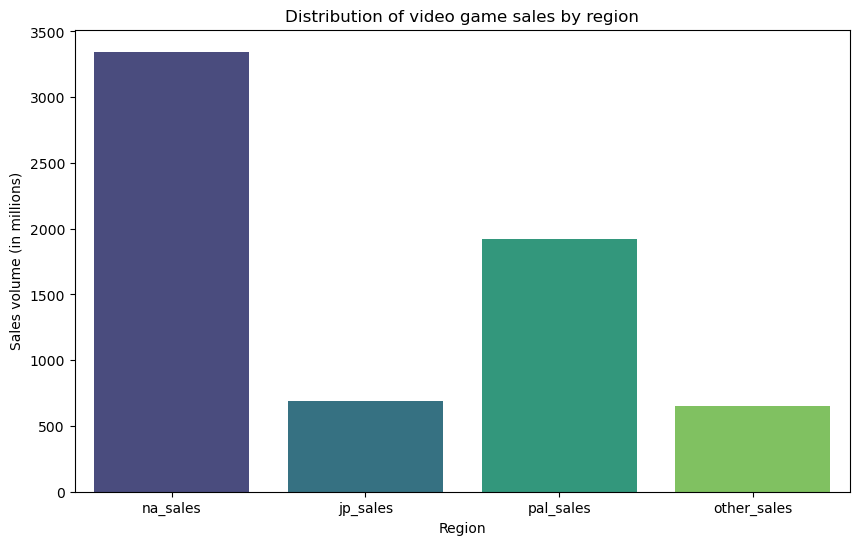

In [7]:
# Visualization of sales distribution by region
regional_sales = games_data[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=regional_sales.index, y=regional_sales.values, palette='viridis')
plt.title('Distribution of video game sales by region')
plt.ylabel('Sales volume (in millions)')
plt.xlabel('Region')
plt.show()

In [8]:
# Top 10 titles with the largest sales differences between regions
games_data['na_jp_difference'] = abs(games_data['na_sales'] - games_data['jp_sales'])
games_data['na_pal_difference'] = abs(games_data['na_sales'] - games_data['pal_sales'])
games_data['na_other_difference'] = abs(games_data['na_sales'] - games_data['other_sales'])
games_data['jp_pal_difference'] = abs(games_data['jp_sales'] - games_data['pal_sales'])
games_data['jp_other_difference'] = abs(games_data['jp_sales'] - games_data['other_sales'])
games_data['pal_other_difference'] = abs(games_data['pal_sales'] - games_data['other_sales'])

largest_differences = games_data.sort_values(
    by=['na_jp_difference', 'na_pal_difference', 'na_other_difference', 'jp_pal_difference', 'jp_other_difference', 'pal_other_difference'],
    ascending=False
)[['title', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']]

print("Top 10 titles with the largest regional sales differences:")
print(largest_differences.head(10))

Top 10 titles with the largest regional sales differences:
                             title  na_sales  jp_sales  pal_sales  other_sales
6          Call of Duty: Black Ops      9.76      0.11       3.73         1.14
3               Grand Theft Auto V      9.06      0.06       5.33         1.42
5   Call of Duty: Modern Warfare 3      9.07      0.13       4.29         1.33
10  Call of Duty: Modern Warfare 2      8.54      0.08       3.63         1.28
8       Call of Duty: Black Ops II      8.27      0.07       4.32         1.20
2      Grand Theft Auto: Vice City      8.41      0.47       5.49         1.78
22                     Halo: Reach      7.08      0.08       2.01         0.80
20            Call of Duty: Ghosts      6.76      0.04       2.64         0.98
13            Grand Theft Auto III      6.99      0.30       4.51         1.30
23                          Halo 4      6.72      0.04       2.36         0.83


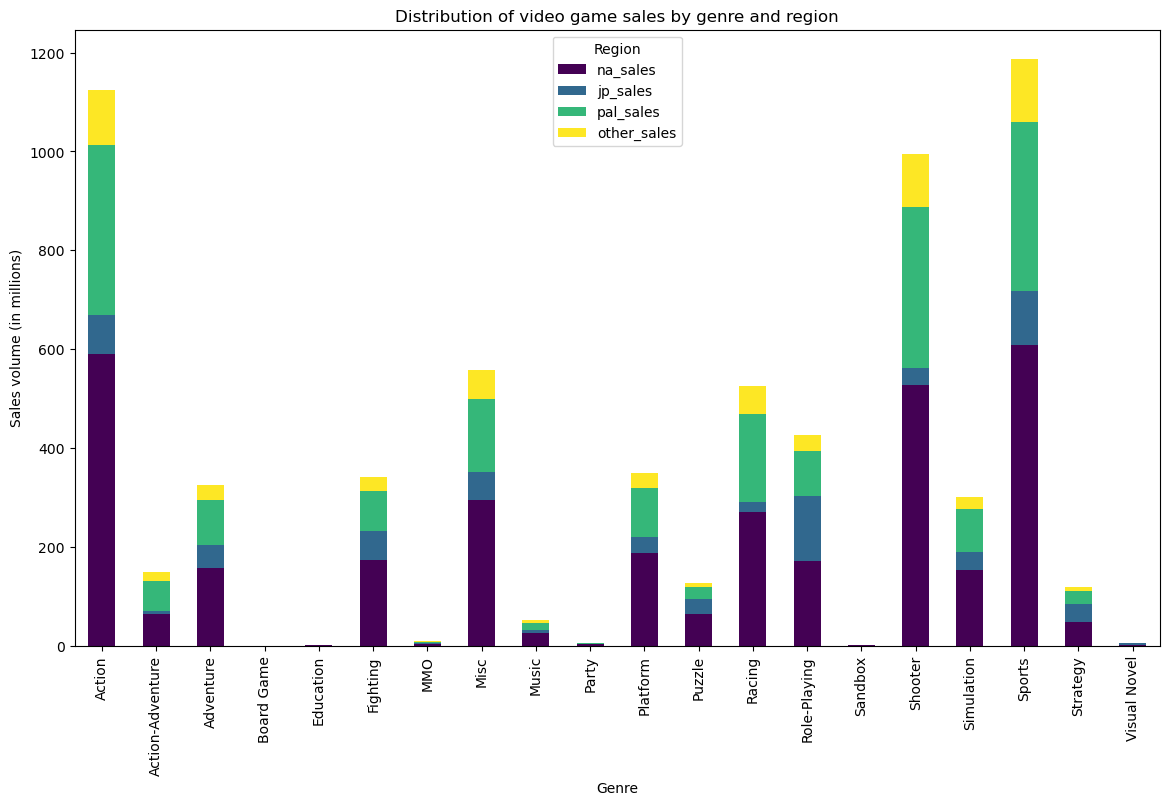

In [9]:
# Visualization of sales by genre in different regions
genre_sales = games_data.groupby('genre')[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum()

genre_sales.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Distribution of video game sales by genre and region')
plt.ylabel('Sales volume (in millions)')
plt.xlabel('Genre')
plt.legend(title='Region')
plt.show()


In [10]:
test_cor_data = games_data.dropna(subset=['critic_score', 'total_sales'])

# correlation between critic ratings and sales
correlation = test_cor_data[['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']].corr()
print("Correlation between critics ratings and sales:\n", correlation)

Correlation between critics ratings and sales:
               critic_score  total_sales  na_sales  jp_sales  pal_sales  \
critic_score      1.000000     0.281166  0.300289  0.147448   0.246694   
total_sales       0.281166     1.000000  0.917376  0.243241   0.919458   
na_sales          0.300289     0.917376  1.000000  0.121175   0.704239   
jp_sales          0.147448     0.243241  0.121175  1.000000   0.226192   
pal_sales         0.246694     0.919458  0.704239  0.226192   1.000000   
other_sales       0.243847     0.906842  0.744483  0.247063   0.875463   

              other_sales  
critic_score     0.243847  
total_sales      0.906842  
na_sales         0.744483  
jp_sales         0.247063  
pal_sales        0.875463  
other_sales      1.000000  


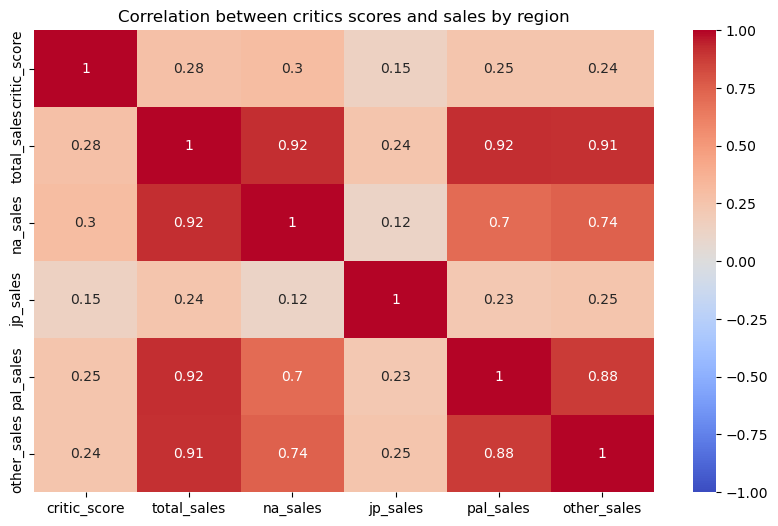

In [11]:
# Visualization of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between critics scores and sales by region')
plt.show()

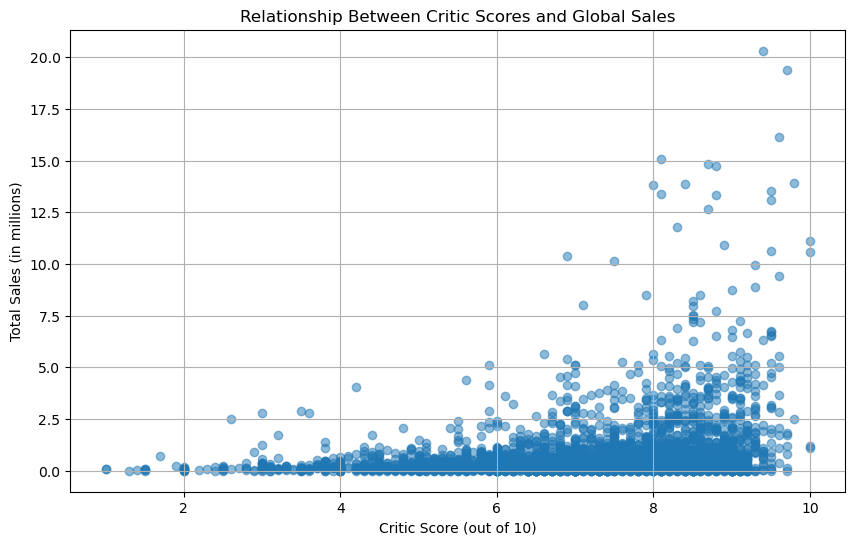

In [12]:
# Relationship between Critic Scores and Global Sales
plt.figure(figsize=(10, 6))
plt.scatter(test_cor_data['critic_score'], test_cor_data['total_sales'], alpha=0.5)
plt.title('Relationship Between Critic Scores and Global Sales')
plt.xlabel('Critic Score (out of 10)')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)
plt.show()

In [13]:
# Average Critic Ratings by Genre
genre_critic_scores = games_data.groupby('genre')['critic_score'].mean().sort_values(ascending=False)
print("Average Critic Ratings by Genre:\n", genre_critic_scores)

Average Critic Ratings by Genre:
 genre
Sandbox             9.200000
Visual Novel        8.500000
Music               7.992593
MMO                 7.781818
Education           7.750000
Action-Adventure    7.678378
Role-Playing        7.470920
Strategy            7.431733
Fighting            7.392424
Adventure           7.341058
Platform            7.307638
Sports              7.291027
Shooter             7.276800
Puzzle              7.201049
Racing              7.187524
Simulation          6.914719
Misc                6.884593
Action              6.831008
Party               5.968750
Board Game          5.300000
Name: critic_score, dtype: float64


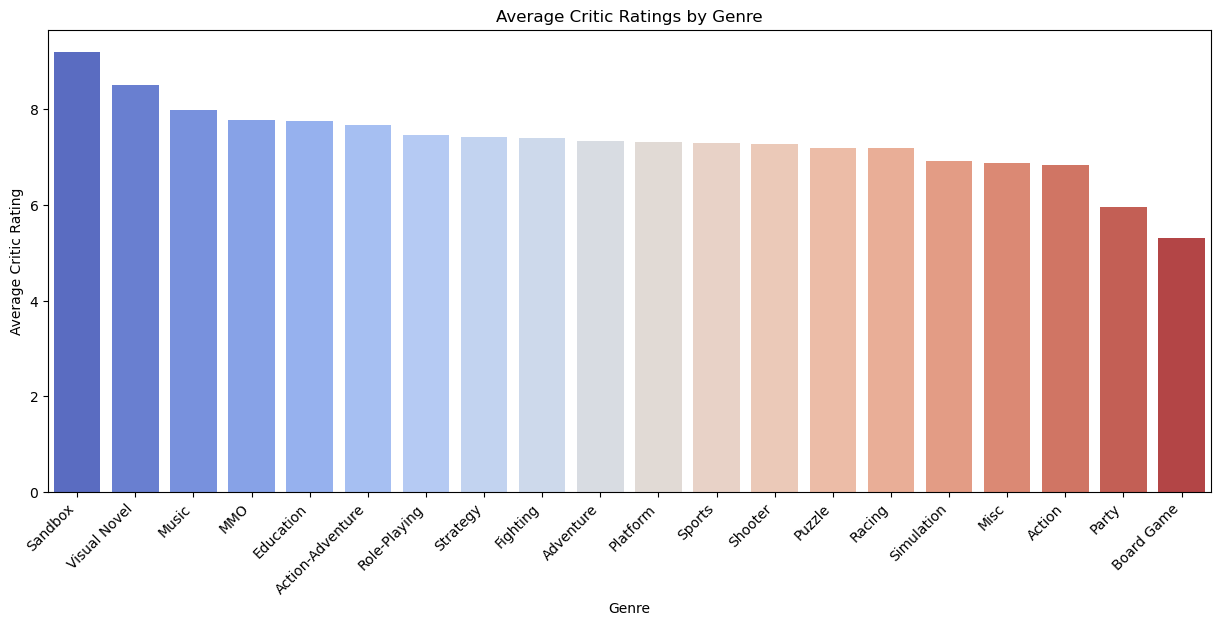

In [14]:
# Visualization of Average Critic Ratings by Genre
plt.figure(figsize=(15, 6))
sns.barplot(x=genre_critic_scores.index, y=genre_critic_scores.values, palette='coolwarm')
plt.title('Average Critic Ratings by Genre')
plt.ylabel('Average Critic Rating')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.show()


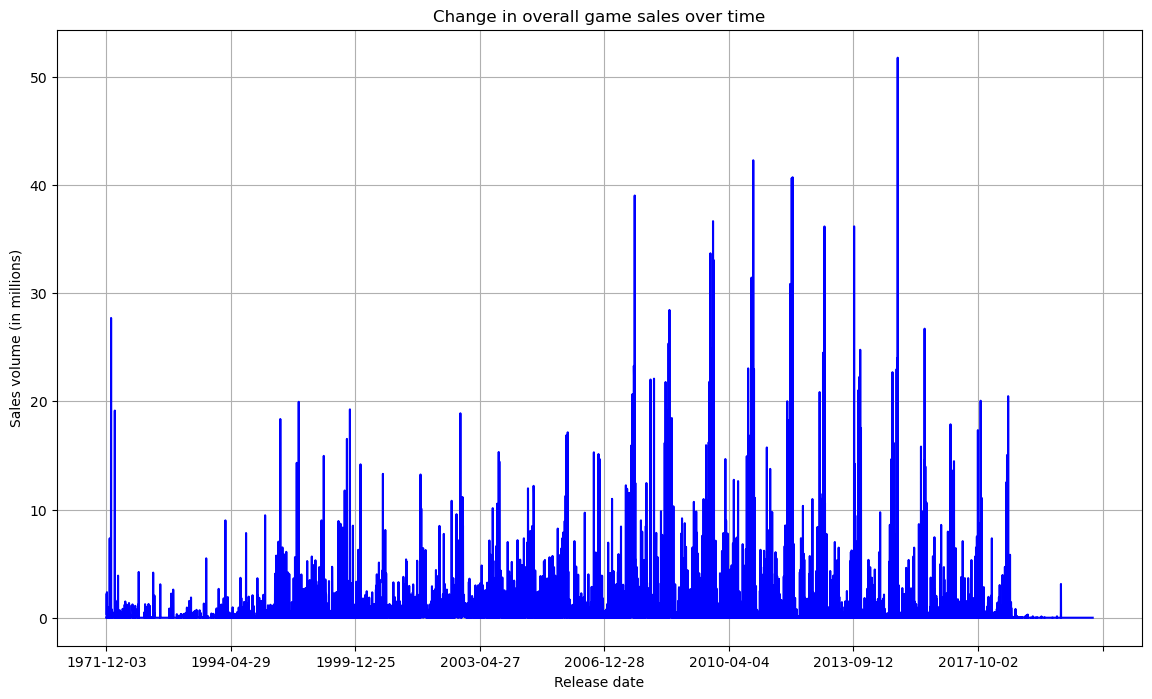

In [15]:
# Visualization of the change in overall game sales over time
if 'release_date' in games_data.columns:
    yearly_sales = games_data.groupby('release_date')['total_sales'].sum()

    plt.figure(figsize=(14, 8))
    yearly_sales.plot(kind='line', color='blue')
    plt.title('Change in overall game sales over time')
    plt.ylabel('Sales volume (in millions)')
    plt.xlabel('Release date')
    plt.grid(True)
    plt.show()


In [16]:
publisher_sales = games_data.groupby('publisher')['total_sales'].sum().sort_values(ascending=False)
developer_sales = games_data.groupby('developer')['total_sales'].sum().sort_values(ascending=False)

# Top 10 Publishers and Developers by Sales
print("Top 10 Publishers by Total Sales:")
print(publisher_sales.head(10))

print("\nTop 10 Developers by Total Sales:")
print(developer_sales.head(10))

Top 10 Publishers by Total Sales:
publisher
Activision                     722.77
Electronic Arts                644.13
EA Sports                      485.66
Ubisoft                        462.57
THQ                            320.89
Sony Computer Entertainment    311.08
Rockstar Games                 239.67
Konami                         210.70
Sega                           206.38
Nintendo                       140.80
Name: total_sales, dtype: float64

Top 10 Developers by Total Sales:
developer
EA Canada            275.56
EA Tiburon           178.33
Ubisoft Montreal     172.96
Treyarch             150.19
Traveller's Tales    149.55
Infinity Ward        118.97
Rockstar North       116.91
Konami               109.54
Visual Concepts       97.61
Capcom                93.02
Name: total_sales, dtype: float64


In [17]:
# Contribution of major publishers to sales by region (in percent)
regional_sales = games_data.groupby('publisher')[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum()

regional_sales['total_sales'] = regional_sales.sum(axis=1)

regional_sales_percentage = regional_sales.div(regional_sales.sum(axis=0), axis=1) * 100

top_publishers = regional_sales.sort_values(by='total_sales', ascending=False).head(10)
top_publishers_percentage = regional_sales_percentage.loc[top_publishers.index]

print("Contribution of major publishers to sales by region (in percent):")
print(top_publishers_percentage)


Contribution of major publishers to sales by region (in percent):
                              na_sales   jp_sales  pal_sales  other_sales  \
publisher                                                                   
Activision                   12.665595   1.091665  11.154354    11.916390   
Electronic Arts               9.621225   1.254470  12.428854    11.540115   
EA Sports                     7.986501   0.476786   8.220865     8.830937   
Ubisoft                       7.152849   0.898334   8.683608     7.723615   
THQ                           5.954829   0.393930   4.614911     4.675022   
Sony Computer Entertainment   4.020003   5.626944   4.976445     6.524143   
Rockstar Games                3.428167   0.678838   4.688470     4.664271   
Konami                        1.978168  10.461668   2.617864     3.432547   
Sega                          2.519190   6.201122   3.158861     2.878118   
Nintendo                      1.598556   8.633020   1.188942     0.770979   

         

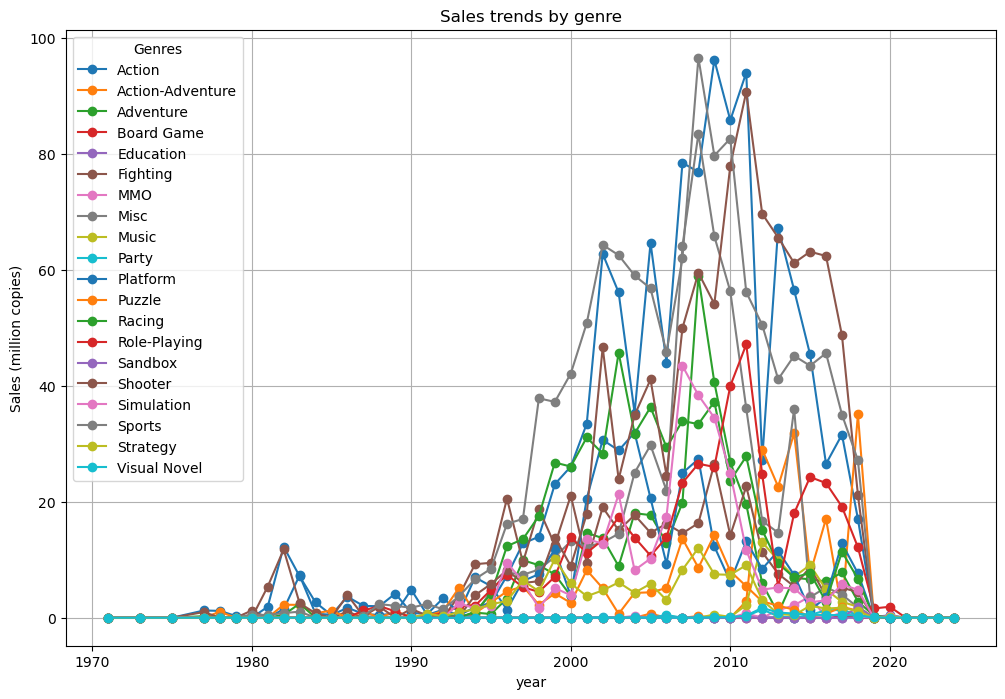

In [18]:
games_data['year'] = pd.to_datetime(games_data['release_date']).dt.year

genre_trends = games_data.groupby(['year', 'genre'])['total_sales'].sum().unstack().fillna(0)

genre_trends.plot(kind='line', stacked=False, figsize=(12, 8), marker='o')
plt.title("Sales trends by genre")
plt.xlabel("year")
plt.ylabel("Sales (million copies)")
plt.grid(True)
plt.legend(title="Genres")
plt.show()